In [9]:
import pandas as pd
import scipy.sparse as sp
import numpy as np
from collections import defaultdict
import copy
import os
import argparse
import tensorflow as tf

In [10]:
emb_factors_plus_d = np.load('npy/var_emb_factors.npy')

In [11]:
emb_factors_minus_d = np.load('npy/var_emb_factors_minus_d.npy')

In [12]:
emb_factors_plus_d.shape

(7663, 10)

## +d

In [13]:
emb_factors_plus_d[[250],:]

array([[ 0.05747738,  0.02250359,  0.09190059, -0.09688206,  0.01869576,
         0.06182275, -0.05510738, -0.03969812,  0.04737812, -0.06735758]],
      dtype=float32)

In [14]:
emb_factors_plus_d[[348],:]

array([[ 0.06164492,  0.04396797,  0.02166009,  0.05133941,  0.05693343,
         0.07756311, -0.00102659,  0.06461478, -0.06131232,  0.08133275]],
      dtype=float32)

## -d

In [15]:
emb_factors_minus_d[[250],:]

array([[ 0.04297281, -0.01072221,  0.05254436,  0.02027144, -0.02329455,
         0.0342722 , -0.06724434,  0.02959047, -0.01961794, -0.06367624]],
      dtype=float32)

In [16]:
emb_factors_minus_d[[348],:]

array([[-0.03391013, -0.0323381 ,  0.09755049,  0.0550533 ,  0.04492789,
         0.00338416, -0.08756154, -0.04458282, -0.05682931, -0.03864572]],
      dtype=float32)

In [17]:
dataset_name = 'MovieLens100k'
path = '../../../data/' + dataset_name + '/ratings.csv' 

In [18]:
data_df = pd.read_csv(path, sep=',', header=None,
                names=['user_id', 'item_id', 'rating', 'time'], index_col=False)

In [19]:
data_df

,user_id,item_id,rating,time
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205
5,1,1263,2.0,1260759151
6,1,1287,2.0,1260759187
7,1,1293,2.0,1260759148
8,1,1339,3.5,1260759125
9,1,1343,2.0,1260759131


In [20]:
num_users = len(data_df['user_id'].unique())
num_users

671

In [21]:
user_emb_factor_plus_d  = emb_factors_plus_d[0:num_users,:]

In [22]:
user_emb_factor_plus_d.shape

(671, 10)

In [23]:
user_emb_factor_minus_d  = emb_factors_minus_d[0:num_users,:]

In [24]:
user_emb_factor_minus_d.shape

(671, 10)

## PCA で次元圧縮する

In [25]:
from time import time
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import offsetbox
from sklearn import (manifold, datasets, decomposition, ensemble,
                     discriminant_analysis, random_projection)

## +d

In [26]:
pca = PCA(n_components=2)
x_pca = pca.fit_transform(user_emb_factor_plus_d)

In [27]:
user_vec_num =  x_pca.shape[0]
user_vec_num

671

In [28]:
X = []
Y = []

for user in range(0, user_vec_num):
    X.append(x_pca[user][0])
    Y.append(x_pca[user][1])

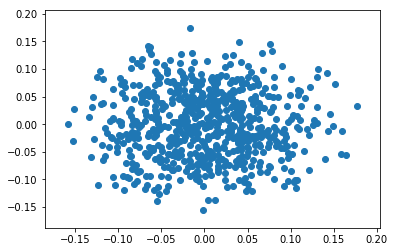

In [29]:
# X, Y の散布図をプロット
plt.scatter(X, Y) 
plt.show()

In [30]:
user_id = list(range(1,user_vec_num+1))

In [31]:
df_user_vec_plus_d = pd.DataFrame(
    data={
        'user_id' : user_id,
        'x' : X,
        'y' : Y
    },
    columns=['user_id', 'x', 'y']
)

In [32]:
df_user_vec_plus_d.to_csv('csv/user_vec_plus_d_2_dim.csv')

## -d

In [33]:
pca = PCA(n_components=2)
x_pca = pca.fit_transform(user_emb_factor_minus_d)

In [34]:
user_vec_num =  x_pca.shape[0]
user_vec_num

671

In [35]:
X = []
Y = []

for user in range(0, user_vec_num):
    X.append(x_pca[user][0])
    Y.append(x_pca[user][1])

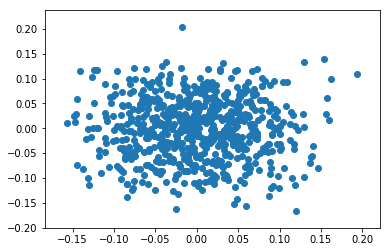

In [36]:
# X, Y の散布図をプロット
plt.scatter(X, Y) 
plt.show()

In [37]:
user_id = list(range(1,user_vec_num+1))

In [38]:
df_user_vec_minus_d = pd.DataFrame(
    data={
        'user_id' : user_id,
        'x' : X,
        'y' : Y
    },
    columns=['user_id', 'x', 'y']
)

In [39]:
df_user_vec_minus_d.to_csv('csv/user_vec_minus_d_2_dim.csv')